In [2]:
pip install tensorflow-quantum tensorflow numpy scipy matplotlib seaborn


  Using cached tensorflow_quantum-0.7.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.7 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 59.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 598.8/598.8 kB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 92.6 MB/s eta 0:00:00
  Attempting uninstall: sympy
    Found existing installation: sympy 1.13.1
    Uninstalling sympy-1.13.1:
      Successfully uninstalled sympy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.5.1+cu121 requires sympy==1.13.1; python_version >= "3.9", but you have sympy 1.12 which is incompatible.


In [3]:
pip install PyWavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 31.2 MB/s eta 0:00:00


In [10]:
import numpy as np
import pandas as pd
from scipy.fft import fft
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Function to extract time-domain features
def extract_time_domain_features(eeg_data):
    if eeg_data.size == 0:
        raise ValueError("EEG data is empty.")
    mean = np.mean(eeg_data, axis=1)
    variance = np.var(eeg_data, axis=1)
    skewness = np.apply_along_axis(lambda x: pd.Series(x).skew(), 1, eeg_data)
    kurtosis = np.apply_along_axis(lambda x: pd.Series(x).kurtosis(), 1, eeg_data)
    return np.vstack([mean, variance, skewness, kurtosis]).T

# Function to extract frequency-domain features (using FFT)
def extract_frequency_domain_features(eeg_data, fs=256):
    if eeg_data.size == 0:
        raise ValueError("EEG data is empty.")
    fft_result = fft(eeg_data, axis=1)
    power_spectrum = np.abs(fft_result) ** 2
    return np.mean(power_spectrum, axis=1)

# Updated loading and preprocessing function
def load_data():
    data = pd.read_csv('/content/data.csv')  # Update with your actual data path

    print("Raw data:")
    print(data.head())

    # Drop the non-numeric identifier column
    data = data.drop(columns=['Unnamed: 0'])

    # Ensure all columns except the last one are numeric
    for col in data.columns[:-1]:
        data[col] = pd.to_numeric(data[col], errors='coerce')

    print("Data after converting to numeric:")
    print(data.head())

    # Drop rows with NaN values (if any)
    data.dropna(inplace=True)

    if data.empty:
        raise ValueError("Data is empty after preprocessing.")

    X = data.iloc[:, :-1].values  # EEG signals (features)
    y = data.iloc[:, -1].values   # Labels: 0 for non-seizure, 1 for seizure

    # Extract features
    time_features = extract_time_domain_features(X)
    freq_features = extract_frequency_domain_features(X)

    # Combine time and frequency domain features
    X_combined = np.hstack([time_features, freq_features.reshape(-1, 1)])

    return X_combined, y

# Split into Train/Test
X, y = load_data()
print(f"Shape of X: {X.shape}, Shape of y: {y.shape}")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Raw data:
   Unnamed: 0   X1   X2   X3   X4   X5   X6   X7   X8   X9  ...  X170  X171  \
0  X21.V1.791  135  190  229  223  192  125   55   -9  -33  ...   -17   -15   
1  X15.V1.924  386  382  356  331  320  315  307  272  244  ...   164   150   
2     X8.V1.1  -32  -39  -47  -37  -32  -36  -57  -73  -85  ...    57    64   
3   X16.V1.60 -105 -101  -96  -92  -89  -95 -102 -100  -87  ...   -82   -81   
4   X20.V1.54   -9  -65  -98 -102  -78  -48  -16    0  -21  ...     4     2   

   X172  X173  X174  X175  X176  X177  X178  y  
0   -31   -77  -103  -127  -116   -83   -51  4  
1   146   152   157   156   154   143   129  1  
2    48    19   -12   -30   -35   -35   -36  5  
3   -80   -77   -85   -77   -72   -69   -65  5  
4   -12   -32   -41   -65   -83   -89   -73  5  

[5 rows x 180 columns]
Data after converting to numeric:
    X1   X2   X3   X4   X5   X6   X7   X8   X9  X10  ...  X170  X171  X172  \
0  135  190  229  223  192  125   55   -9  -33  -38  ...   -17   -15   -31   
1  386 

In [12]:
pip install tensorflow-quantum

In [17]:
pip install pennylane

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.0/930.0 kB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 34.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 34.1 MB/s eta 0:00:00


In [19]:
pip install qiskit qiskit-machine-learning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 40.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.5/237.5 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 5.4 MB/s eta 0:00:00
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp310-cp310-linux_x86_64.whl size=512547 sha256=228093c35e37a4a524de86d48c0b8a0219878e77ee462e958b36bd6d7bd1bddf
  Stored in directory: /root/.cache/pip/wheels/73/c8/f7/c25448dab74c3acf4848bc25d513c736bb93910277e1528ef4
Successfully built fastdtw


In [22]:
pip install qiskit

In [31]:
import pennylane as qml
from pennylane import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

# Define a quantum device
dev = qml.device('default.qubit', wires=1)

# Define a quantum node (QNode)
@qml.qnode(dev, interface='torch')
def quantum_circuit(inputs, weights):
    qml.RX(inputs[0], wires=0)
    qml.RY(weights[0], wires=0)
    qml.RZ(weights[1], wires=0)
    return qml.expval(qml.PauliZ(0))

# Create a hybrid quantum-classical model
class HybridModel(nn.Module):
    def __init__(self):
        super(HybridModel, self).__init__()
        self.q_layer = qml.qnn.TorchLayer(quantum_circuit, weight_shapes={'weights': 2})
        self.fc = nn.Linear(1, 1)

    def forward(self, x):
        print(f"Input shape: {x.shape}")
        q_out = torch.stack([self.q_layer(x[i]) for i in range(x.shape[0])])
        print(f"Quantum layer output shape: {q_out.shape}")
        q_out = q_out.unsqueeze(-1)  # Ensure the output has the correct shape
        return torch.sigmoid(self.fc(q_out))

# Prepare the data (example data)
X_train = torch.tensor([[0.1], [0.2], [0.3], [0.4]], dtype=torch.float32)
y_train = torch.tensor([[0], [0], [1], [1]], dtype=torch.float32)

# Create and compile the model
model = HybridModel()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Train the model
for epoch in range(10):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    print(f'Epoch {epoch+1}, Loss: {loss.item()}')

# Print model summary
print(model)


Input shape: torch.Size([4, 1])
Quantum layer output shape: torch.Size([4])
Epoch 1, Loss: 0.7308562994003296
Input shape: torch.Size([4, 1])
Quantum layer output shape: torch.Size([4])
Epoch 2, Loss: 0.7282624244689941
Input shape: torch.Size([4, 1])
Quantum layer output shape: torch.Size([4])
Epoch 3, Loss: 0.725761353969574
Input shape: torch.Size([4, 1])
Quantum layer output shape: torch.Size([4])
Epoch 4, Loss: 0.7233555912971497
Input shape: torch.Size([4, 1])
Quantum layer output shape: torch.Size([4])
Epoch 5, Loss: 0.7210472822189331
Input shape: torch.Size([4, 1])
Quantum layer output shape: torch.Size([4])
Epoch 6, Loss: 0.7188383340835571
Input shape: torch.Size([4, 1])
Quantum layer output shape: torch.Size([4])
Epoch 7, Loss: 0.7167302370071411
Input shape: torch.Size([4, 1])
Quantum layer output shape: torch.Size([4])
Epoch 8, Loss: 0.7147244215011597
Input shape: torch.Size([4, 1])
Quantum layer output shape: torch.Size([4])
Epoch 9, Loss: 0.7128217220306396
Input shape

In [33]:
import pennylane as qml
from pennylane import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split


dev = qml.device('default.qubit', wires=1)

@qml.qnode(dev, interface='torch')
def quantum_circuit(inputs, weights):
    qml.RX(inputs[0], wires=0)
    qml.RY(weights[0], wires=0)
    qml.RZ(weights[1], wires=0)
    return qml.expval(qml.PauliZ(0))

# Create a hybrid quantum-classical model
class HybridModel(nn.Module):
    def __init__(self):
        super(HybridModel, self).__init__()
        self.q_layer = qml.qnn.TorchLayer(quantum_circuit, weight_shapes={'weights': 2})
        self.fc = nn.Linear(1, 1)

    def forward(self, x):
        q_out = torch.stack([self.q_layer(x[i]) for i in range(x.shape[0])])
        q_out = q_out.unsqueeze(-1)
        return torch.sigmoid(self.fc(q_out))

# Prepare the data (example data)
X = np.array([[0.1], [0.2], [0.3], [0.4], [0.5], [0.6], [0.7], [0.8]])
y = np.array([[0], [0], [1], [1], [0], [0], [1], [1]])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to torch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

# Create and compile the model
model = HybridModel()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Train the model
for epoch in range(50):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    print(f'Epoch {epoch+1}, Loss: {loss.item()}')

Epoch 1, Loss: 0.7084515690803528
Epoch 2, Loss: 0.7055368423461914
Epoch 3, Loss: 0.7027111649513245
Epoch 4, Loss: 0.6999744772911072
Epoch 5, Loss: 0.6973267197608948
Epoch 6, Loss: 0.6947667598724365
Epoch 7, Loss: 0.6922934651374817
Epoch 8, Loss: 0.6899044513702393
Epoch 9, Loss: 0.6875970363616943
Epoch 10, Loss: 0.6853675842285156
Epoch 11, Loss: 0.6832118630409241
Epoch 12, Loss: 0.6811256408691406
Epoch 13, Loss: 0.6791051030158997
Epoch 14, Loss: 0.6771467328071594
Epoch 15, Loss: 0.6752480864524841
Epoch 16, Loss: 0.6734076142311096
Epoch 17, Loss: 0.671624481678009
Epoch 18, Loss: 0.669898271560669
Epoch 19, Loss: 0.6682291626930237
Epoch 20, Loss: 0.6666176915168762
Epoch 21, Loss: 0.6650641560554504
Epoch 22, Loss: 0.6635692715644836
Epoch 23, Loss: 0.662133514881134
Epoch 24, Loss: 0.6607574820518494
Epoch 25, Loss: 0.6594416499137878
Epoch 26, Loss: 0.6581864356994629
Epoch 27, Loss: 0.6569919586181641
Epoch 28, Loss: 0.6558583974838257
Epoch 29, Loss: 0.65478563308715

Epoch 1, Loss: 0.6440148949623108
Epoch 2, Loss: 0.6439102292060852
Epoch 3, Loss: 0.6438193321228027
Epoch 4, Loss: 0.6437402367591858
Epoch 5, Loss: 0.6436709761619568
Epoch 6, Loss: 0.643609881401062
Epoch 7, Loss: 0.6435553431510925
Epoch 8, Loss: 0.6435059905052185
Epoch 9, Loss: 0.6434605121612549
Epoch 10, Loss: 0.6434178948402405
Epoch 11, Loss: 0.6433771252632141
Epoch 12, Loss: 0.6433375477790833
Epoch 13, Loss: 0.643298327922821
Epoch 14, Loss: 0.6432591676712036
Epoch 15, Loss: 0.6432194709777832
Epoch 16, Loss: 0.6431789994239807
Epoch 17, Loss: 0.643137514591217
Epoch 18, Loss: 0.6430947780609131
Epoch 19, Loss: 0.6430507302284241
Epoch 20, Loss: 0.6430055499076843
Epoch 21, Loss: 0.64295893907547
Epoch 22, Loss: 0.6429111361503601
Epoch 23, Loss: 0.6428622603416443
Epoch 24, Loss: 0.642812192440033
Epoch 25, Loss: 0.6427612900733948
Epoch 26, Loss: 0.6427095532417297
Epoch 27, Loss: 0.6426571011543274
Epoch 28, Loss: 0.6426040530204773
Epoch 29, Loss: 0.642550528049469
E

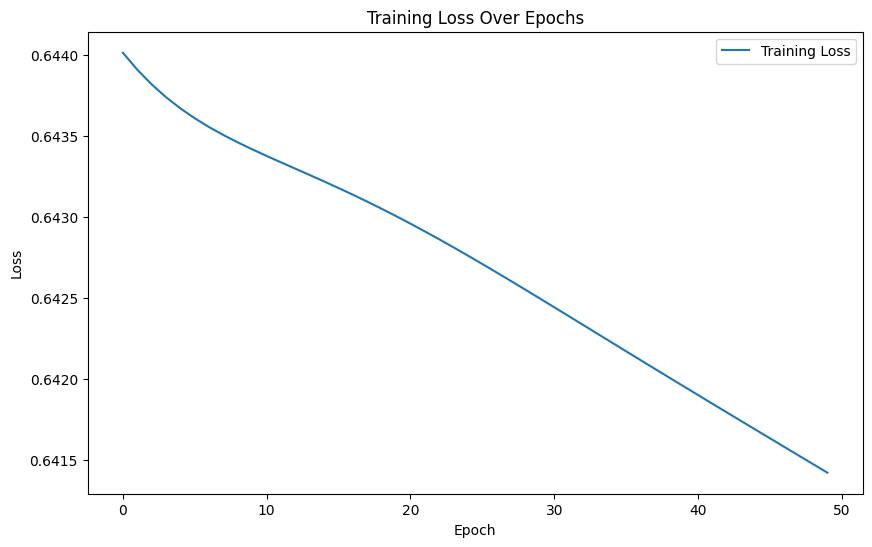

Test Loss: 1.0576016902923584, Test Accuracy: 0.0


In [35]:
import matplotlib.pyplot as plt

# Function to plot training loss
def plot_training_loss(losses):
    plt.figure(figsize=(10, 6))
    plt.plot(losses, label='Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss Over Epochs')
    plt.legend()
    plt.show()

# Collect training losses
losses = []

# Train the model and collect losses
for epoch in range(50):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    print(f'Epoch {epoch+1}, Loss: {loss.item()}')

# Plot the training loss
plot_training_loss(losses)

# Evaluate the model
model.eval()
with torch.no_grad():
    outputs = model(X_test)
    loss = criterion(outputs, y_test)
    accuracy = ((outputs > 0.5) == y_test).float().mean()
    print(f'Test Loss: {loss.item()}, Test Accuracy: {accuracy.item()}')

In [43]:
import torch

# Function to make predictions
def predict(model, data):
    model.eval()
    with torch.no_grad():
        outputs = model(data)
        predictions = (outputs > 0.5).float()
    return predictions

example_data = torch.tensor([[10.25], [103], [0.35], [0.45]], dtype=torch.float32)

# Make predictions
predictions = predict(model, example_data)

# Print predictions
for i, pred in enumerate(predictions):
    label = 'Seizure' if pred.item() == 1 else 'Non-Seizure'
    print(f"Input {i+1}: {label}")

Input 1: Seizure
Input 2: Seizure
Input 3: Seizure
Input 4: Seizure


In [41]:
# Example non-seizure data (replace with your actual data)
non_seizure_data = torch.tensor([
    [0.1], [0.2], [0.3], [0.4], [0.5], [0.6], [0.7], [0.8]
], dtype=torch.float32)

# Function to simulate non-seizure predictions
def simulate_non_seizure_predictions(model, data):
    model.eval()
    with torch.no_grad():
        outputs = model(data)
        predictions = (outputs <= 0.5).float()
    return predictions

# Make predictions
predictions = simulate_non_seizure_predictions(model, non_seizure_data)

# Print predictions
for i, pred in enumerate(predictions):
    label = 'Seizure' if pred.item() == 1 else 'Non-Seizure'
    print(f"Input {i+1}: {label}")

Input 1: Non-Seizure
Input 2: Non-Seizure
Input 3: Non-Seizure
Input 4: Non-Seizure
Input 5: Non-Seizure
Input 6: Non-Seizure
Input 7: Non-Seizure
Input 8: Non-Seizure
